In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import asyncio
import os
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')
import sys
from utils import *

In [2]:
path = '../data/data.csv'
df = pd.read_csv(path, sep=',')

In [3]:
df.head()

,DATAFLOW,LAST UPDATE,freq,product,currency,unit,indic_en,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AL,2021,0.00,e,NaN
1,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AL,2022,0.00,e,NaN
2,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2013,21.32,NaN,NaN
3,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2014,20.78,NaN,NaN
4,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2015,20.28,NaN,NaN


### Validating and checking

In [4]:
df.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'product', 'currency', 'unit',
       'indic_en', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG',
       'CONF_STATUS'],
      dtype='object')

In [5]:
check_null(df, check_individual=True)

Null value report by column:

List of columns with null values: ['OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS']

Columns with null values:


,Total,Percentage (%)
OBS_VALUE,1,0.13
OBS_FLAG,767,97.09
CONF_STATUS,789,99.87



Null values in column 'OBS_VALUE':


,DATAFLOW,LAST UPDATE,freq,product,currency,unit,indic_en,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
289,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,PL,2024,NaN,NaN,C



Null values in column 'OBS_FLAG':


,DATAFLOW,LAST UPDATE,freq,product,currency,unit,indic_en,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
2,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2013,21.3200,NaN,NaN
3,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2014,20.7800,NaN,NaN
4,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2015,20.2800,NaN,NaN
5,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2016,19.1700,NaN,NaN
6,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2017,18.7100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
785,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2016,7.6422,NaN,NaN
786,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2017,6.5778,NaN,NaN
787,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2018,6.8814,NaN,NaN
788,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2019,7.2799,NaN,NaN



Null values in column 'CONF_STATUS':


,DATAFLOW,LAST UPDATE,freq,product,currency,unit,indic_en,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AL,2021,0.0000,e,NaN
1,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AL,2022,0.0000,e,NaN
2,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2013,21.3200,NaN,NaN
3,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2014,20.7800,NaN,NaN
4,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSHH,AT,2015,20.2800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
785,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2016,7.6422,NaN,NaN
786,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2017,6.5778,NaN,NaN
787,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2018,6.8814,NaN,NaN
788,ESTAT:TEN00118(1.0),21/05/25 23:00:00,A,4100,EUR,GJ_GCV,MSIND,UK,2019,7.2799,NaN,NaN


In [6]:
check_types(df)


Checking data types by column:



DATAFLOW        object
LAST UPDATE     object
freq            object
product          int64
currency        object
unit            object
indic_en        object
geo             object
TIME_PERIOD      int64
OBS_VALUE      float64
OBS_FLAG        object
CONF_STATUS     object
dtype: object


Columns with numeric values:
['product', 'TIME_PERIOD', 'OBS_VALUE']

Column 'product' contains only valid numeric values.

Column 'TIME_PERIOD' contains only valid numeric values.

Column 'OBS_VALUE' contains only valid numeric values.

Columns with non-numeric values:
['DATAFLOW', 'LAST UPDATE', 'freq', 'currency', 'unit', 'indic_en', 'geo', 'OBS_FLAG', 'CONF_STATUS']

Sample values from column 'DATAFLOW':


0    ESTAT:TEN00118(1.0)
1    ESTAT:TEN00118(1.0)
2    ESTAT:TEN00118(1.0)
3    ESTAT:TEN00118(1.0)
4    ESTAT:TEN00118(1.0)
Name: DATAFLOW, dtype: object


Sample values from column 'LAST UPDATE':


0    21/05/25 23:00:00
1    21/05/25 23:00:00
2    21/05/25 23:00:00
3    21/05/25 23:00:00
4    21/05/25 23:00:00
Name: LAST UPDATE, dtype: object


Sample values from column 'freq':


0    A
1    A
2    A
3    A
4    A
Name: freq, dtype: object


Sample values from column 'currency':


0    EUR
1    EUR
2    EUR
3    EUR
4    EUR
Name: currency, dtype: object


Sample values from column 'unit':


0    GJ_GCV
1    GJ_GCV
2    GJ_GCV
3    GJ_GCV
4    GJ_GCV
Name: unit, dtype: object


Sample values from column 'indic_en':


0    MSHH
1    MSHH
2    MSHH
3    MSHH
4    MSHH
Name: indic_en, dtype: object


Sample values from column 'geo':


0    AL
1    AL
2    AT
3    AT
4    AT
Name: geo, dtype: object


Sample values from column 'OBS_FLAG':


0      e
1      e
2    NaN
3    NaN
4    NaN
Name: OBS_FLAG, dtype: object


Sample values from column 'CONF_STATUS':


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: CONF_STATUS, dtype: object

In [7]:
check_anomalies(df)


Checking columns for anomalies...


Columns with detected anomalies:
 - Column 'DATAFLOW': All values are the same


0    ESTAT:TEN00118(1.0)
1    ESTAT:TEN00118(1.0)
2    ESTAT:TEN00118(1.0)
3    ESTAT:TEN00118(1.0)
4    ESTAT:TEN00118(1.0)
Name: DATAFLOW, dtype: object

 - Column 'LAST UPDATE': All values are the same


0    21/05/25 23:00:00
1    21/05/25 23:00:00
2    21/05/25 23:00:00
3    21/05/25 23:00:00
4    21/05/25 23:00:00
Name: LAST UPDATE, dtype: object

 - Column 'freq': All values are the same


0    A
1    A
2    A
3    A
4    A
Name: freq, dtype: object

 - Column 'product': All values are the same


0    4100
1    4100
2    4100
3    4100
4    4100
Name: product, dtype: int64

 - Column 'currency': All values are the same


0    EUR
1    EUR
2    EUR
3    EUR
4    EUR
Name: currency, dtype: object

 - Column 'unit': All values are the same


0    GJ_GCV
1    GJ_GCV
2    GJ_GCV
3    GJ_GCV
4    GJ_GCV
Name: unit, dtype: object

 - Column 'CONF_STATUS': All values are the same


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: CONF_STATUS, dtype: object


Total columns that are OK: 5 out of 12



Categorical columns for grouping: ['DATAFLOW', 'LAST UPDATE', 'freq', 'currency', 'unit', 'indic_en', 'geo', 'OBS_FLAG', 'CONF_STATUS']

Count of grouped elements by DATAFLOW:


,DATAFLOW,Total
0,ESTAT:TEN00118(1.0),790


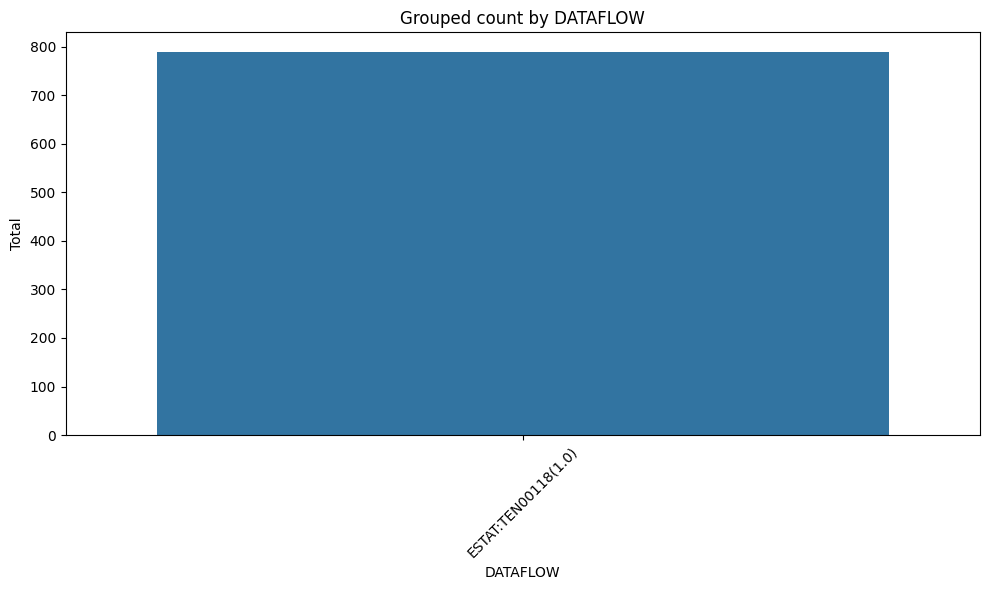


Count of grouped elements by LAST UPDATE:


,LAST UPDATE,Total
0,21/05/25 23:00:00,790


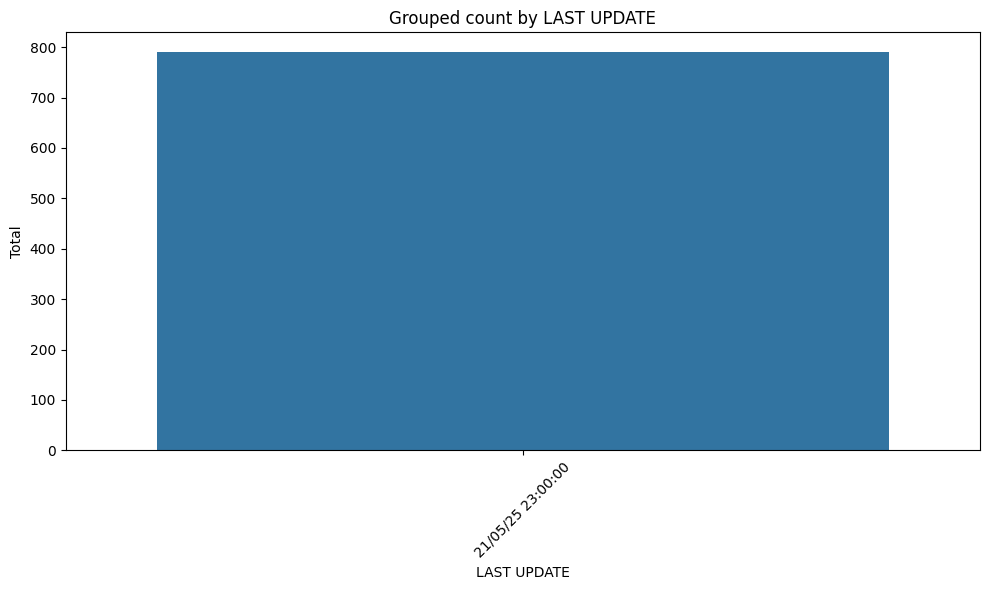


Count of grouped elements by freq:


,freq,Total
0,A,790


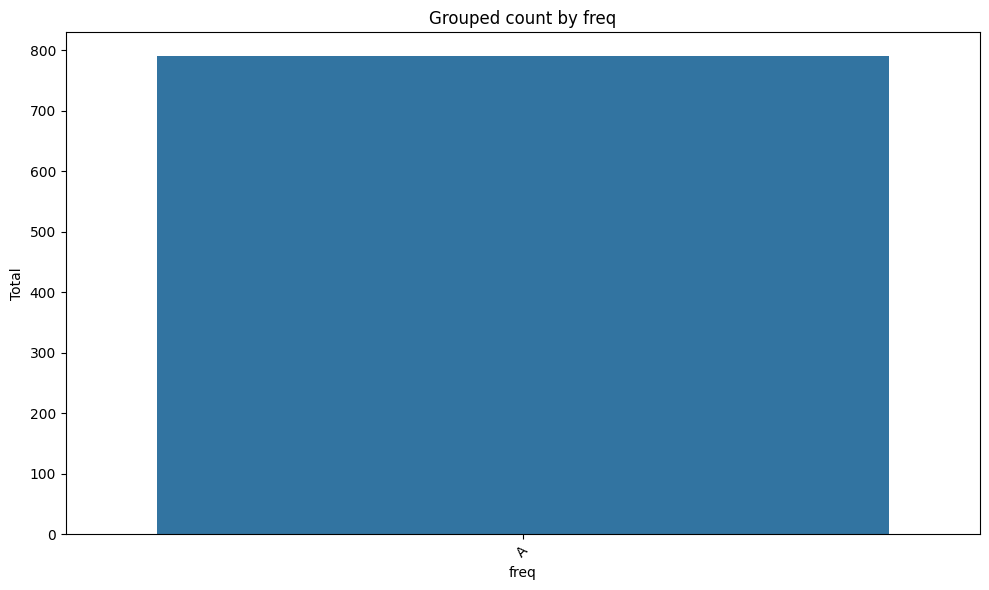


Count of grouped elements by currency:


,currency,Total
0,EUR,790


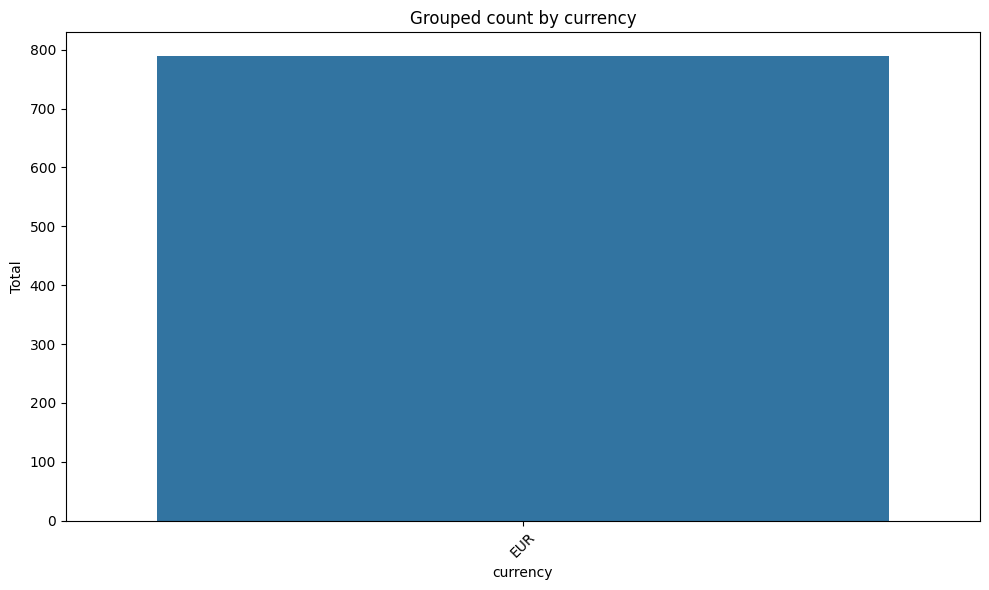


Count of grouped elements by unit:


,unit,Total
0,GJ_GCV,790


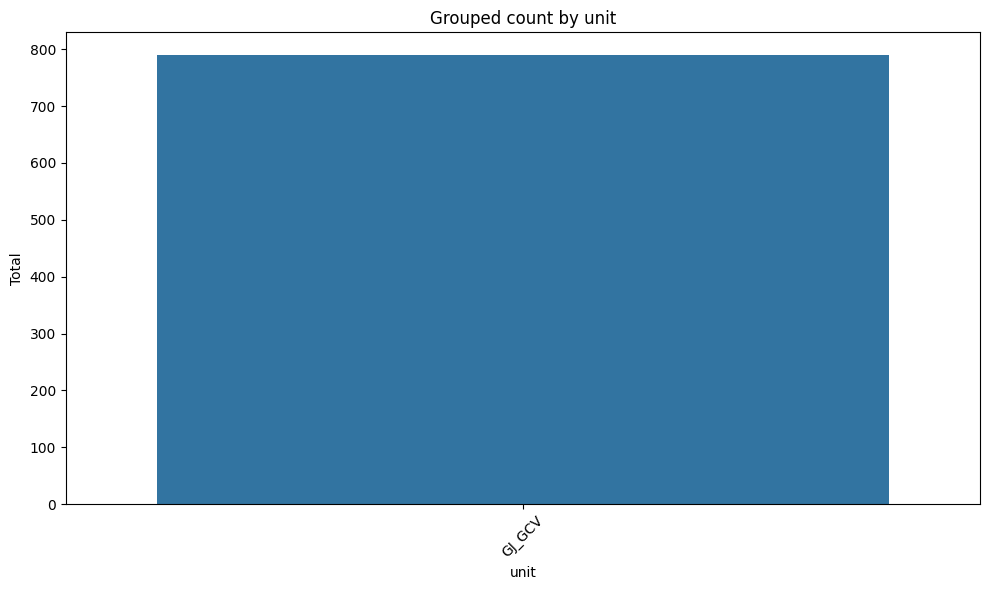


Count of grouped elements by indic_en:


,indic_en,Total
0,MSHH,388
1,MSIND,402


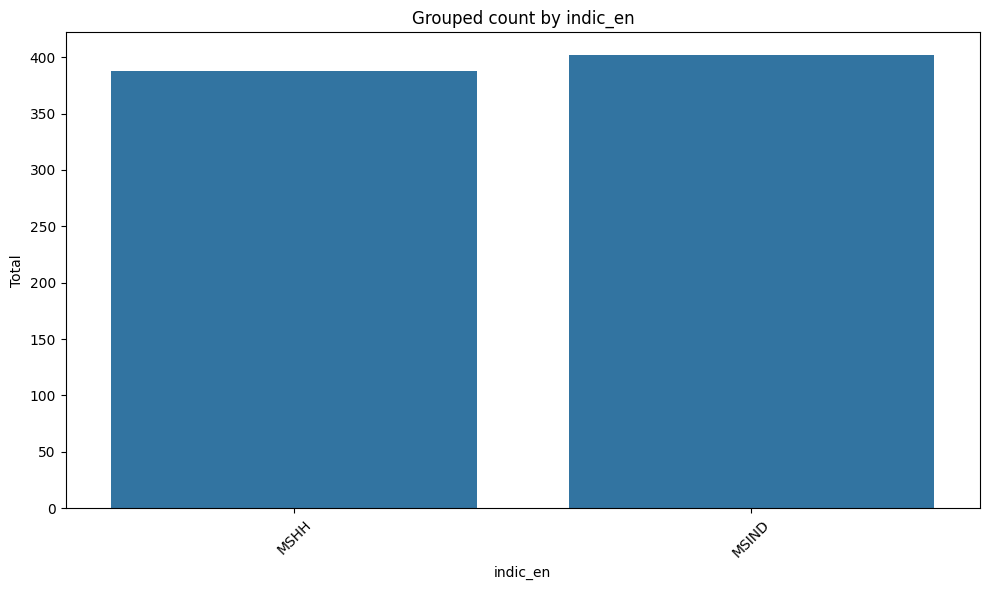


Count of grouped elements by geo:


,geo,Total
0,AL,3
1,AT,24
2,BA,24
3,BE,24
4,BG,24
5,CZ,24
6,DE,24
7,DK,24
8,EE,24
9,EL,24


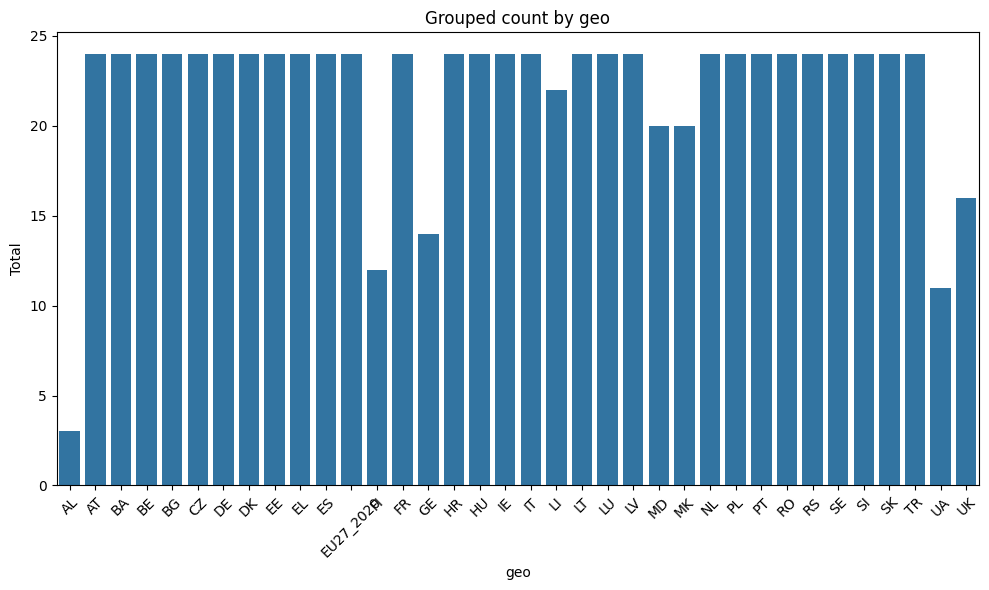


Count of grouped elements by OBS_FLAG:


,OBS_FLAG,Total
0,b,2
1,d,3
2,e,16
3,p,2


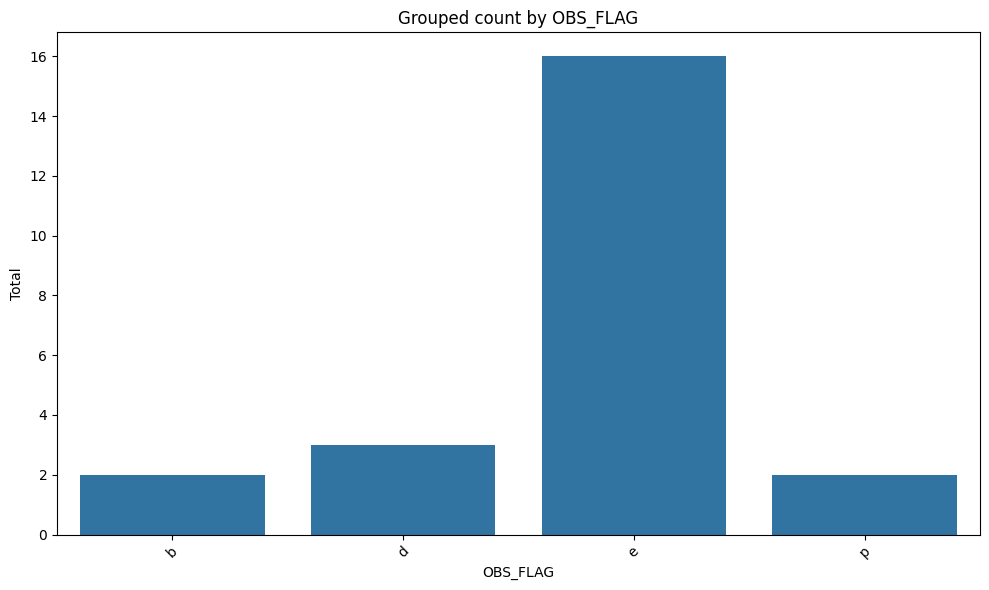


Count of grouped elements by CONF_STATUS:


,CONF_STATUS,Total
0,C,1


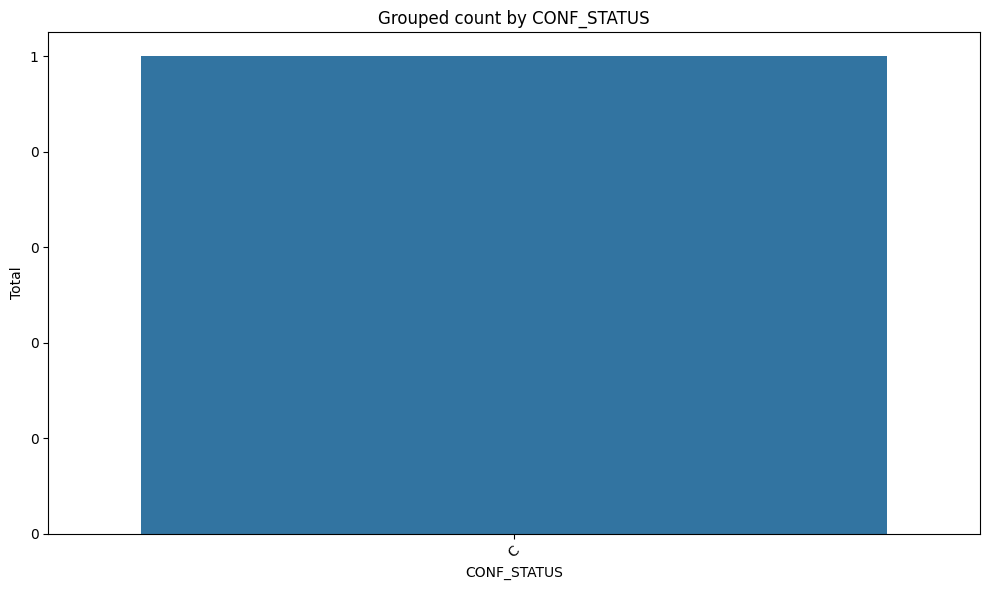


Count of grouped elements by DATAFLOW, LAST UPDATE:


,DATAFLOW,LAST UPDATE,Total
0,ESTAT:TEN00118(1.0),21/05/25 23:00:00,790


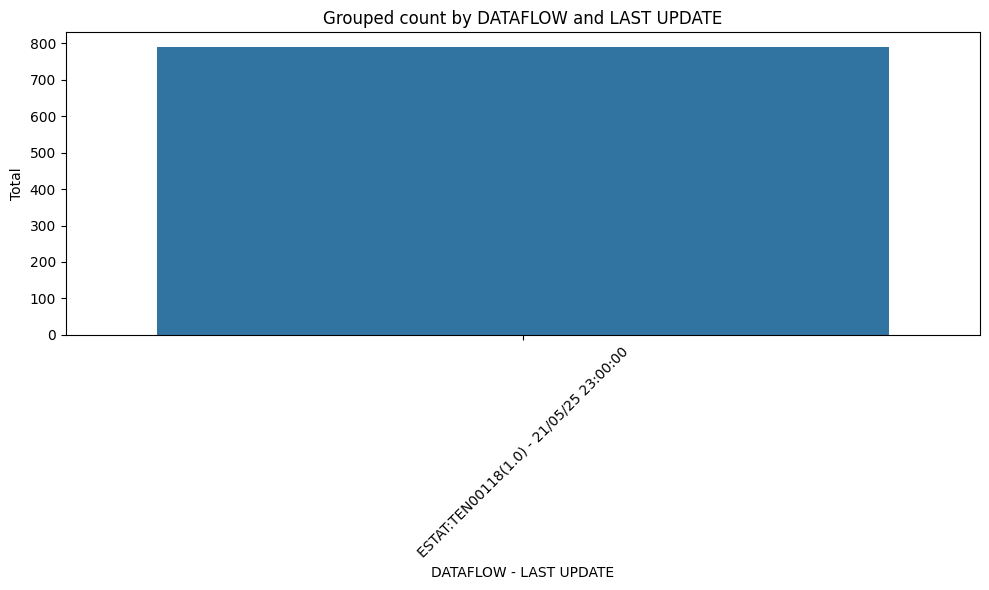


Count of grouped elements by DATAFLOW, freq:


,DATAFLOW,freq,Total
0,ESTAT:TEN00118(1.0),A,790


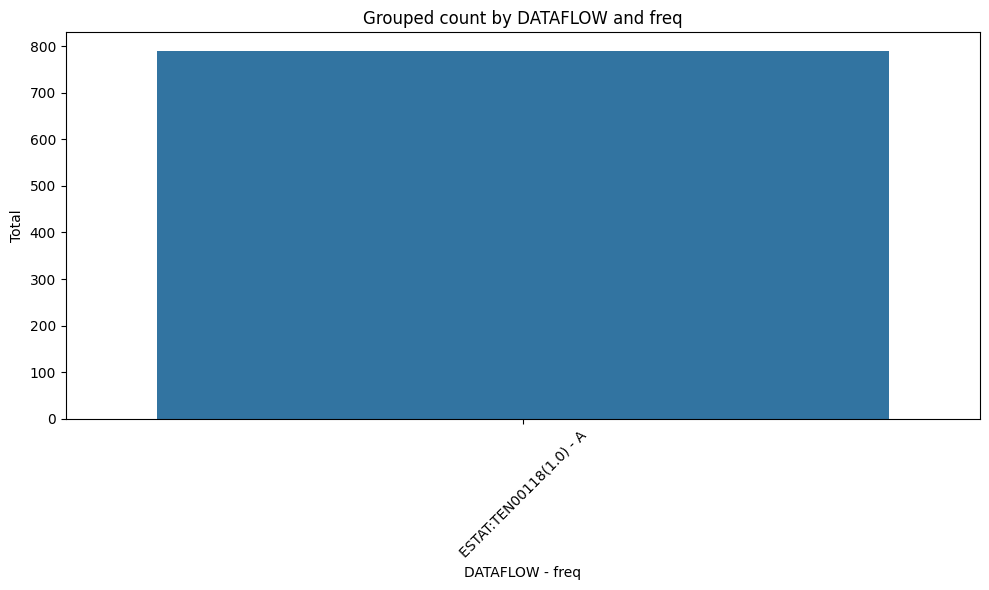


Count of grouped elements by DATAFLOW, currency:


,DATAFLOW,currency,Total
0,ESTAT:TEN00118(1.0),EUR,790


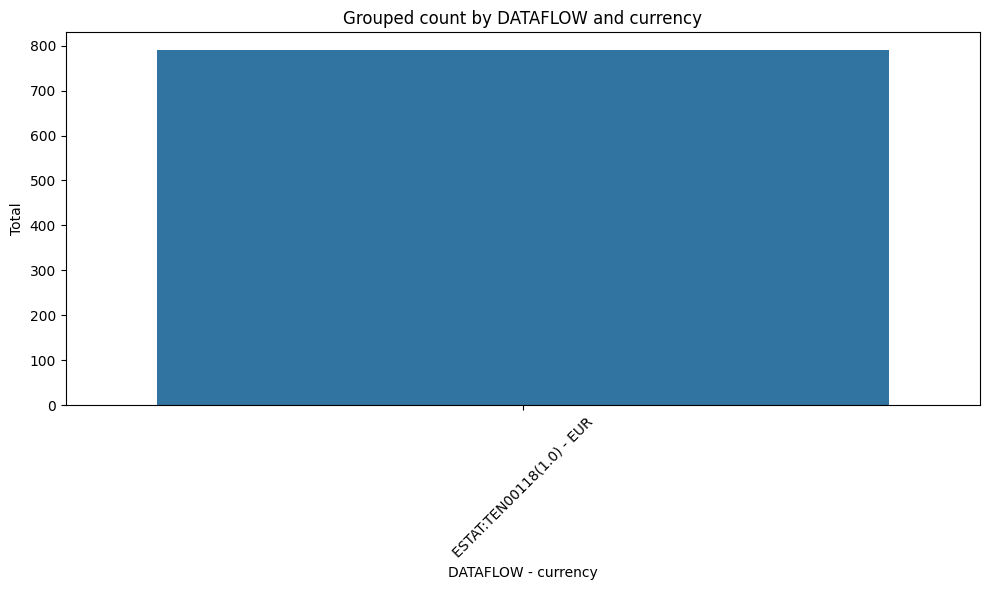


Count of grouped elements by DATAFLOW, unit:


,DATAFLOW,unit,Total
0,ESTAT:TEN00118(1.0),GJ_GCV,790


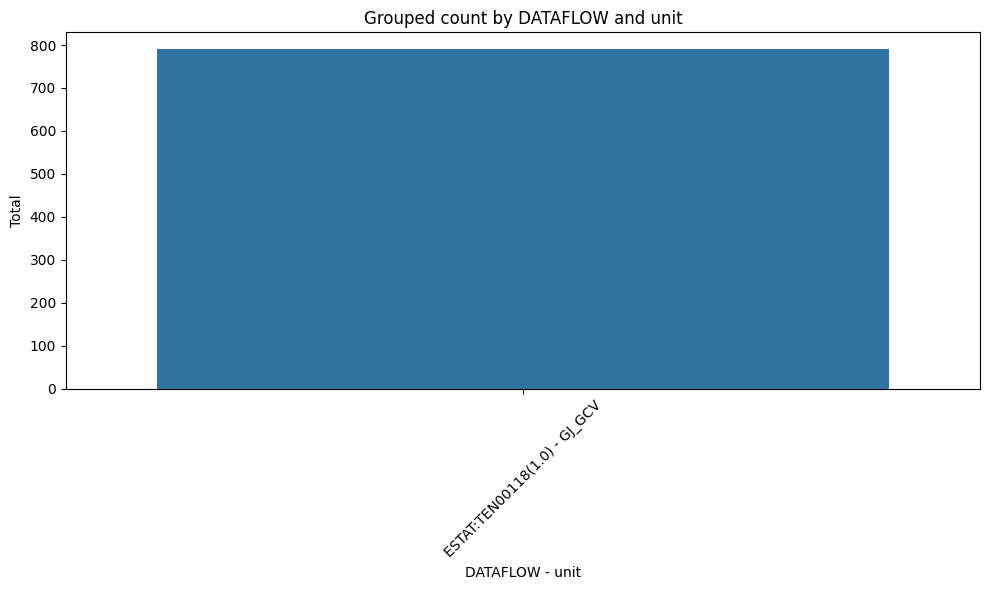


Count of grouped elements by DATAFLOW, indic_en:


,DATAFLOW,indic_en,Total
0,ESTAT:TEN00118(1.0),MSHH,388
1,ESTAT:TEN00118(1.0),MSIND,402


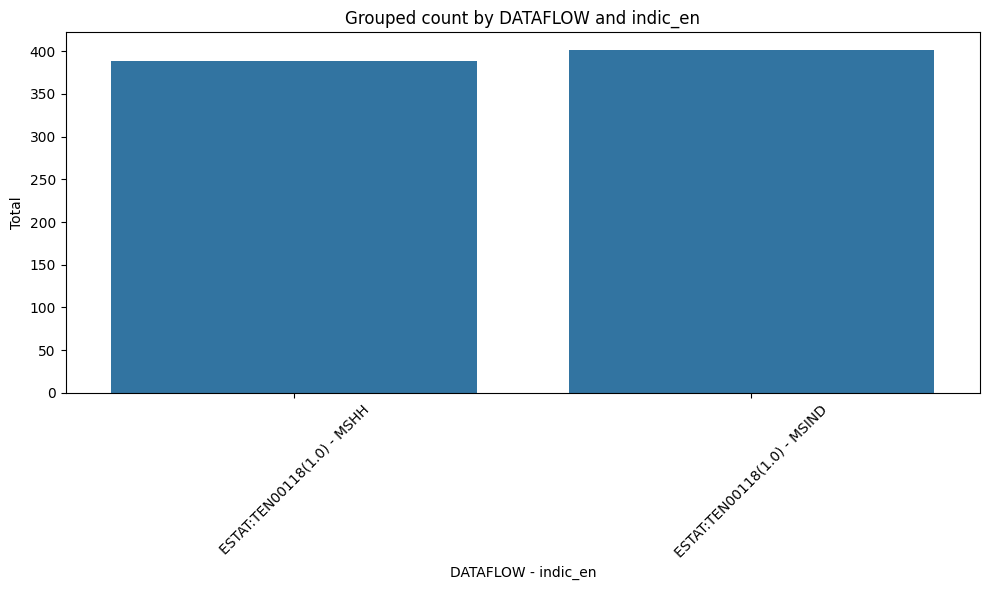


Count of grouped elements by DATAFLOW, geo:


,DATAFLOW,geo,Total
0,ESTAT:TEN00118(1.0),AL,3
1,ESTAT:TEN00118(1.0),AT,24
2,ESTAT:TEN00118(1.0),BA,24
3,ESTAT:TEN00118(1.0),BE,24
4,ESTAT:TEN00118(1.0),BG,24
5,ESTAT:TEN00118(1.0),CZ,24
6,ESTAT:TEN00118(1.0),DE,24
7,ESTAT:TEN00118(1.0),DK,24
8,ESTAT:TEN00118(1.0),EE,24
9,ESTAT:TEN00118(1.0),EL,24


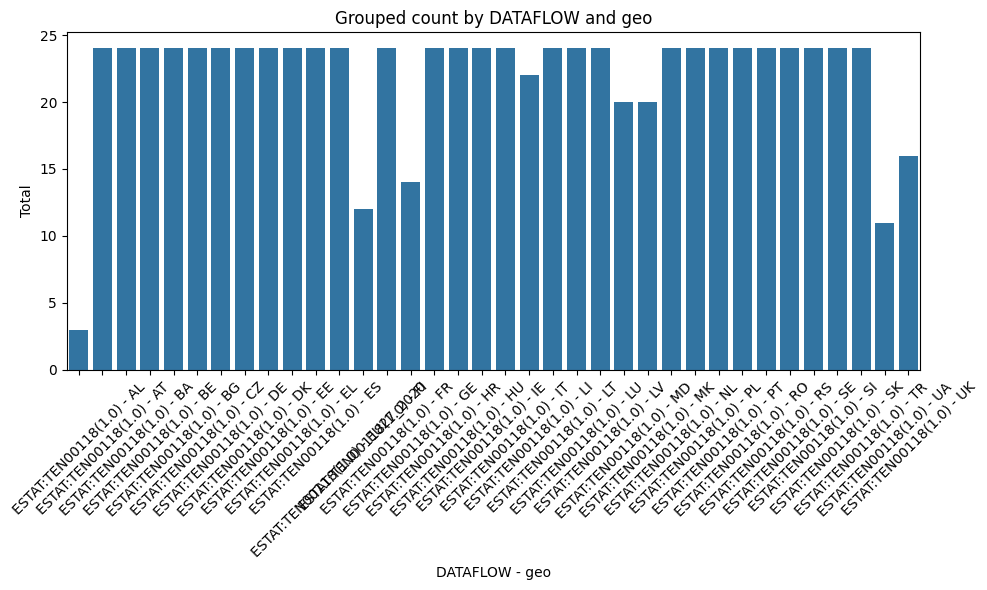


Count of grouped elements by DATAFLOW, OBS_FLAG:


,DATAFLOW,OBS_FLAG,Total
0,ESTAT:TEN00118(1.0),b,2
1,ESTAT:TEN00118(1.0),d,3
2,ESTAT:TEN00118(1.0),e,16
3,ESTAT:TEN00118(1.0),p,2


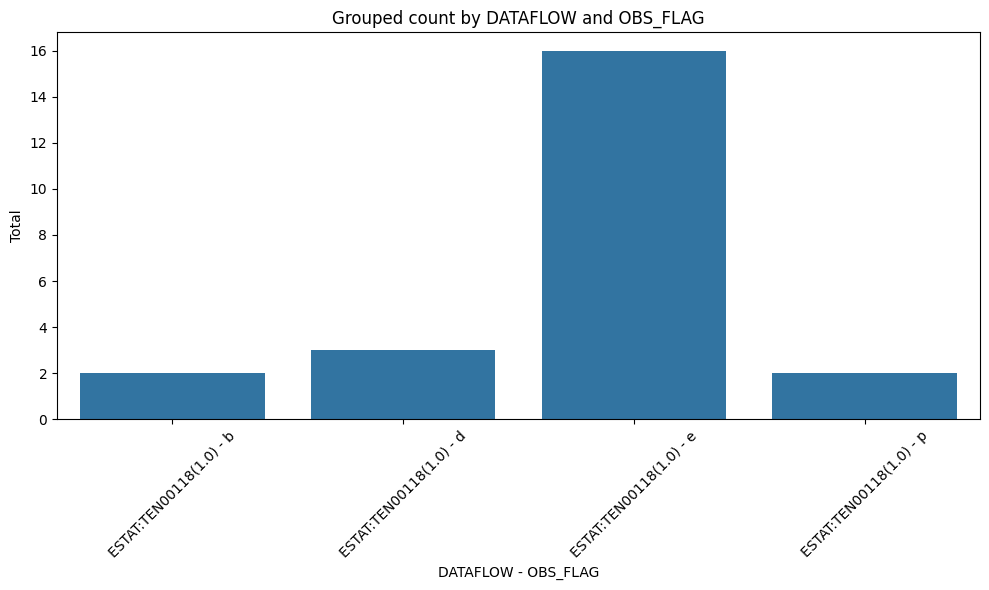


Count of grouped elements by DATAFLOW, CONF_STATUS:


,DATAFLOW,CONF_STATUS,Total
0,ESTAT:TEN00118(1.0),C,1


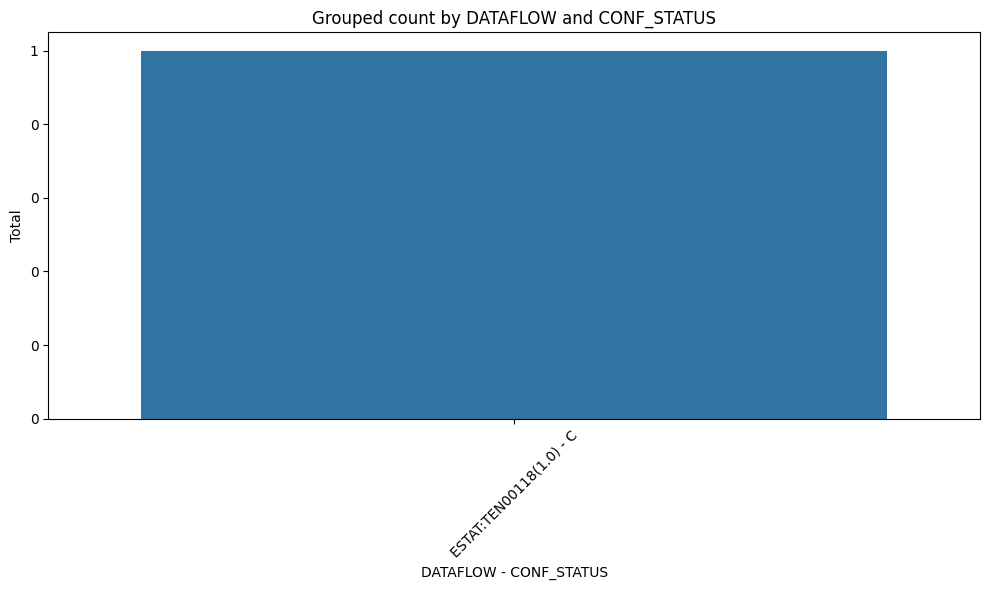


Count of grouped elements by LAST UPDATE, freq:


,LAST UPDATE,freq,Total
0,21/05/25 23:00:00,A,790


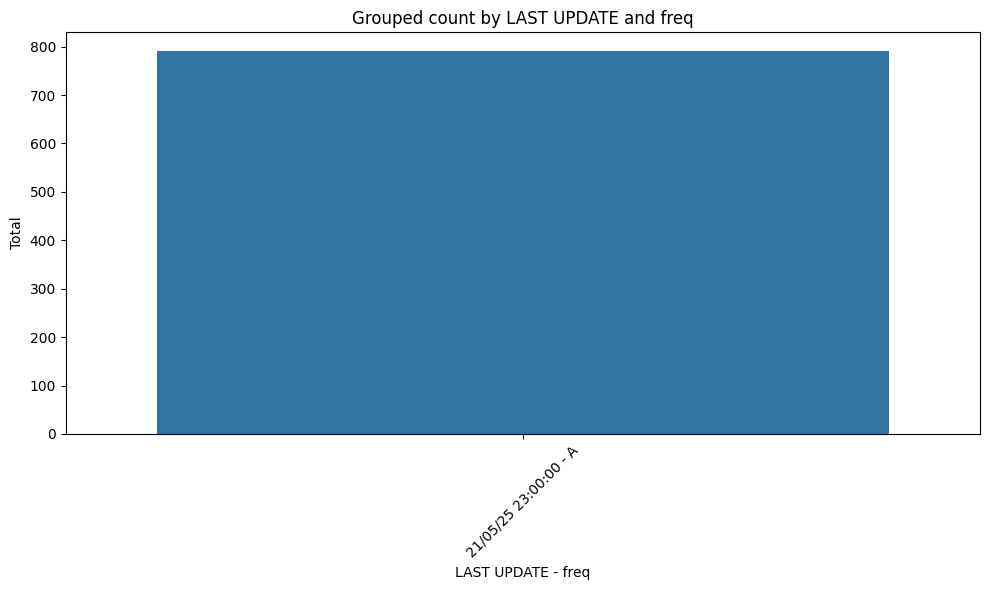


Count of grouped elements by LAST UPDATE, currency:


,LAST UPDATE,currency,Total
0,21/05/25 23:00:00,EUR,790


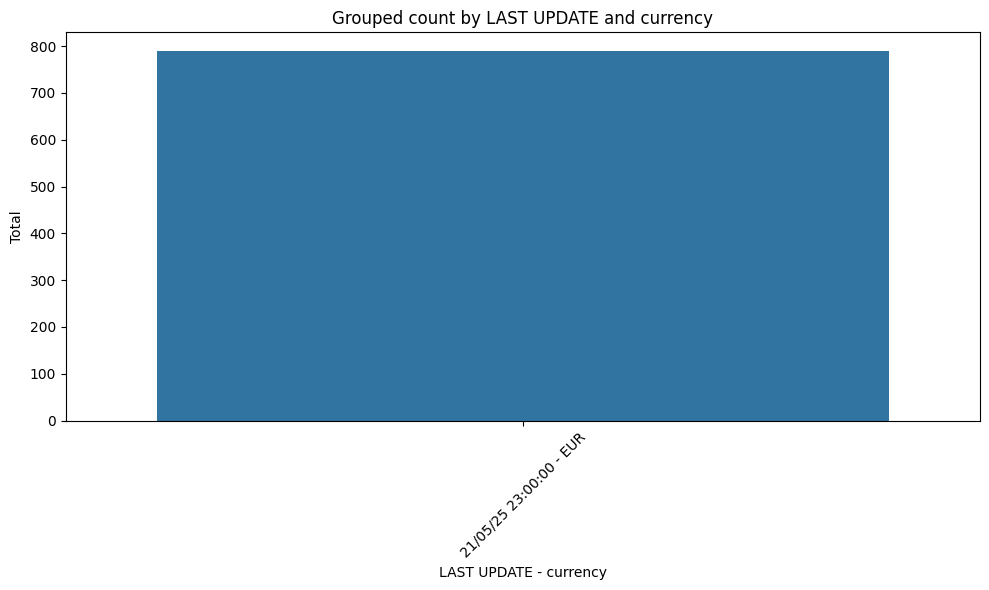


Count of grouped elements by LAST UPDATE, unit:


,LAST UPDATE,unit,Total
0,21/05/25 23:00:00,GJ_GCV,790


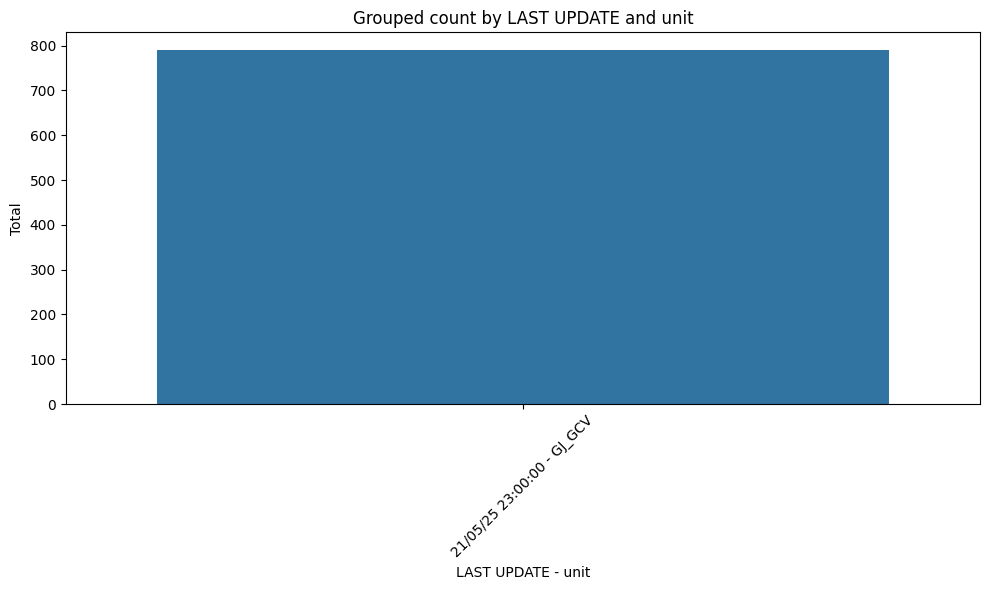


Count of grouped elements by LAST UPDATE, indic_en:


,LAST UPDATE,indic_en,Total
0,21/05/25 23:00:00,MSHH,388
1,21/05/25 23:00:00,MSIND,402


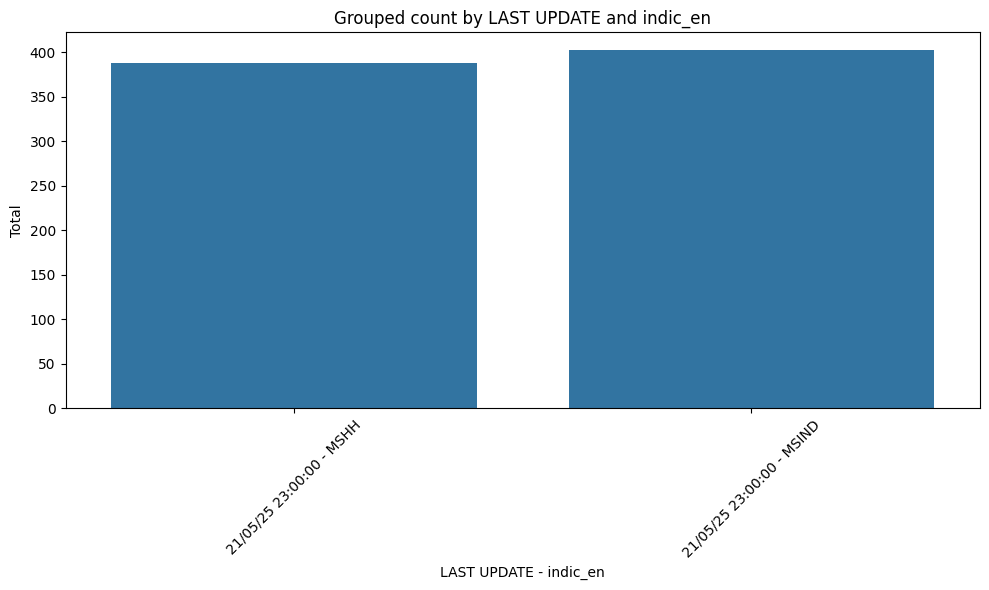


Count of grouped elements by LAST UPDATE, geo:


,LAST UPDATE,geo,Total
0,21/05/25 23:00:00,AL,3
1,21/05/25 23:00:00,AT,24
2,21/05/25 23:00:00,BA,24
3,21/05/25 23:00:00,BE,24
4,21/05/25 23:00:00,BG,24
5,21/05/25 23:00:00,CZ,24
6,21/05/25 23:00:00,DE,24
7,21/05/25 23:00:00,DK,24
8,21/05/25 23:00:00,EE,24
9,21/05/25 23:00:00,EL,24


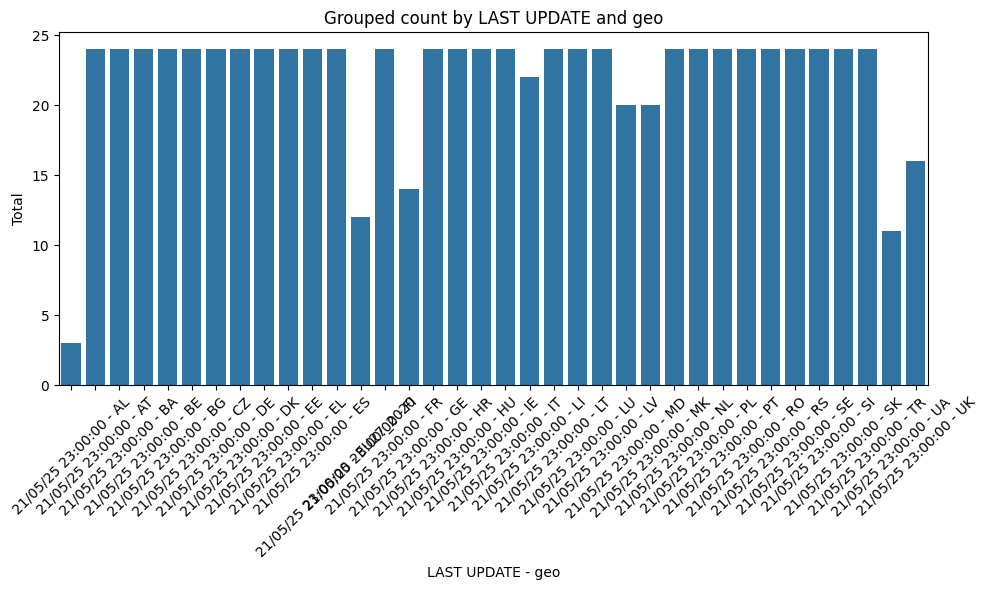


Count of grouped elements by LAST UPDATE, OBS_FLAG:


,LAST UPDATE,OBS_FLAG,Total
0,21/05/25 23:00:00,b,2
1,21/05/25 23:00:00,d,3
2,21/05/25 23:00:00,e,16
3,21/05/25 23:00:00,p,2


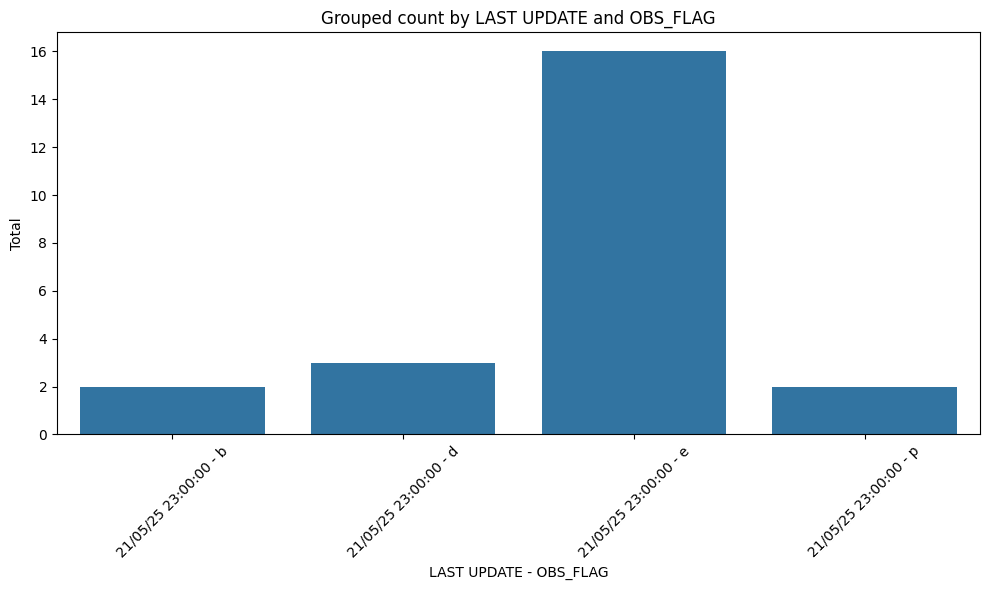


Count of grouped elements by LAST UPDATE, CONF_STATUS:


,LAST UPDATE,CONF_STATUS,Total
0,21/05/25 23:00:00,C,1


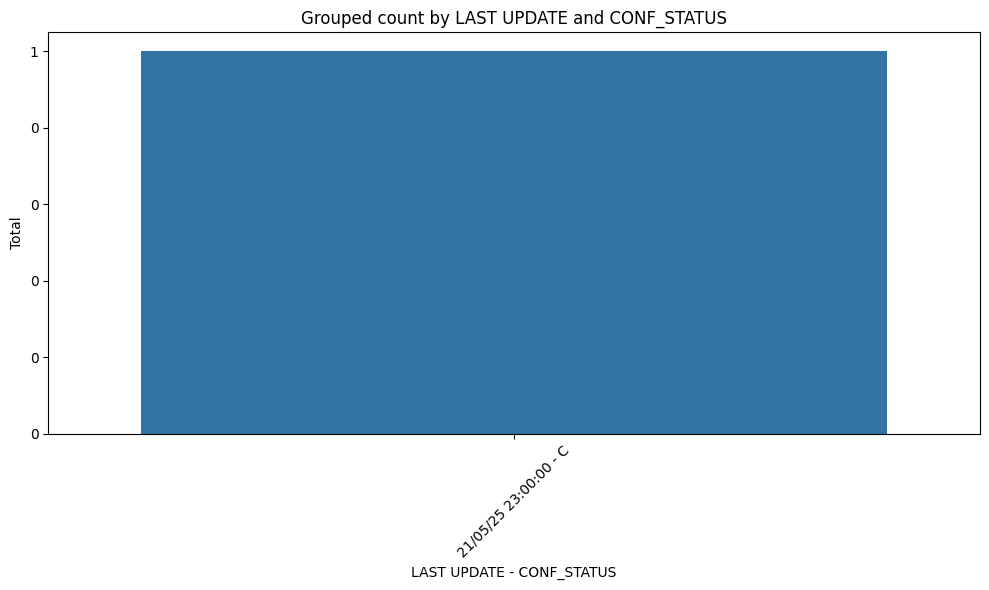


Count of grouped elements by freq, currency:


,freq,currency,Total
0,A,EUR,790


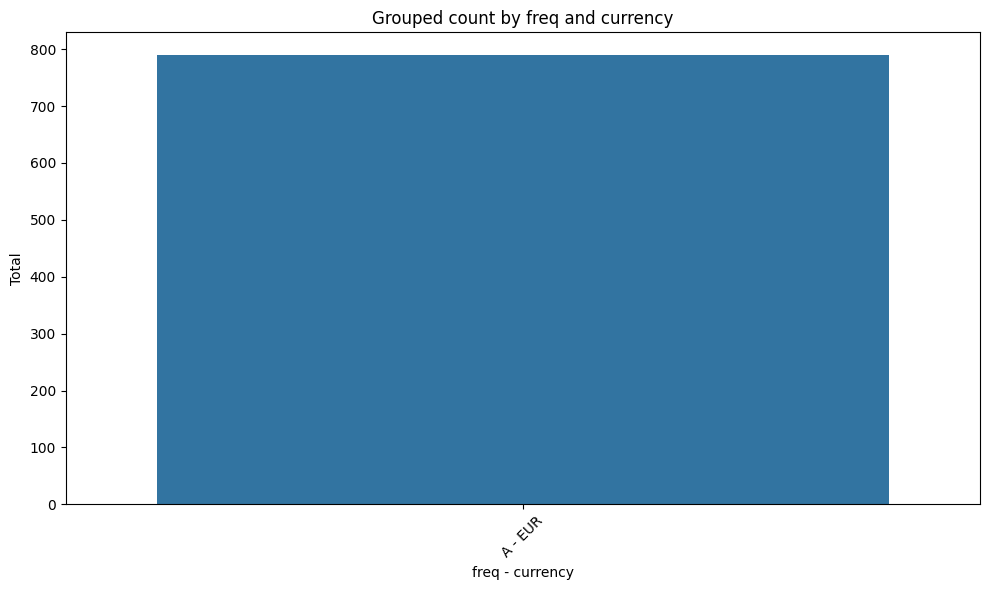


Count of grouped elements by freq, unit:


,freq,unit,Total
0,A,GJ_GCV,790


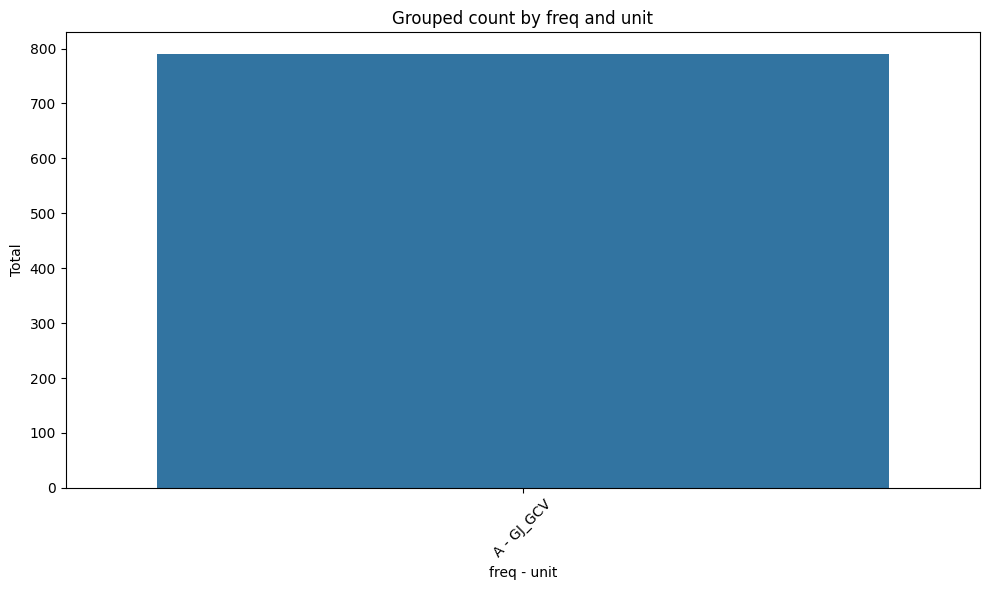


Count of grouped elements by freq, indic_en:


,freq,indic_en,Total
0,A,MSHH,388
1,A,MSIND,402


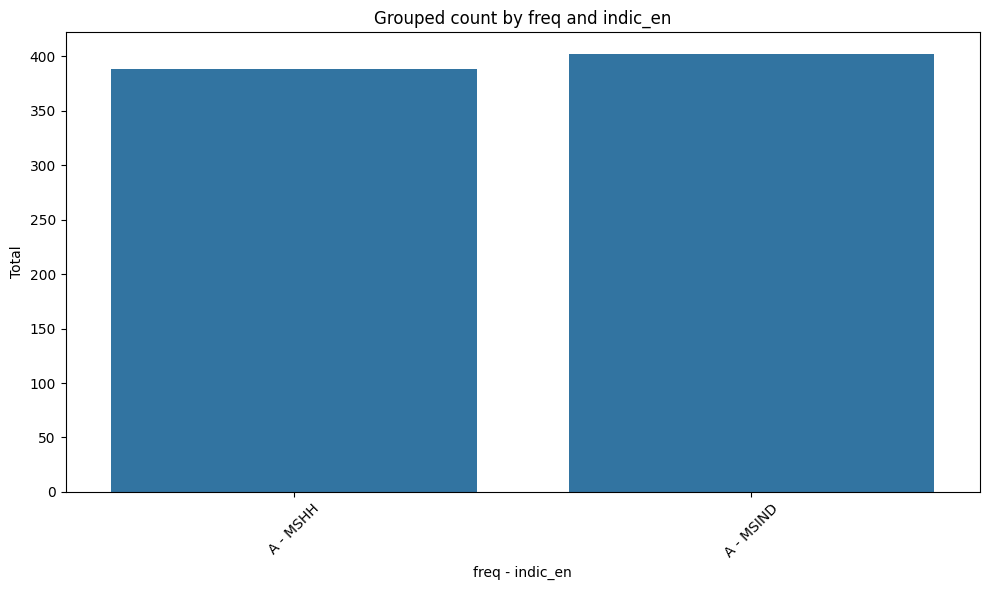


Count of grouped elements by freq, geo:


,freq,geo,Total
0,A,AL,3
1,A,AT,24
2,A,BA,24
3,A,BE,24
4,A,BG,24
5,A,CZ,24
6,A,DE,24
7,A,DK,24
8,A,EE,24
9,A,EL,24


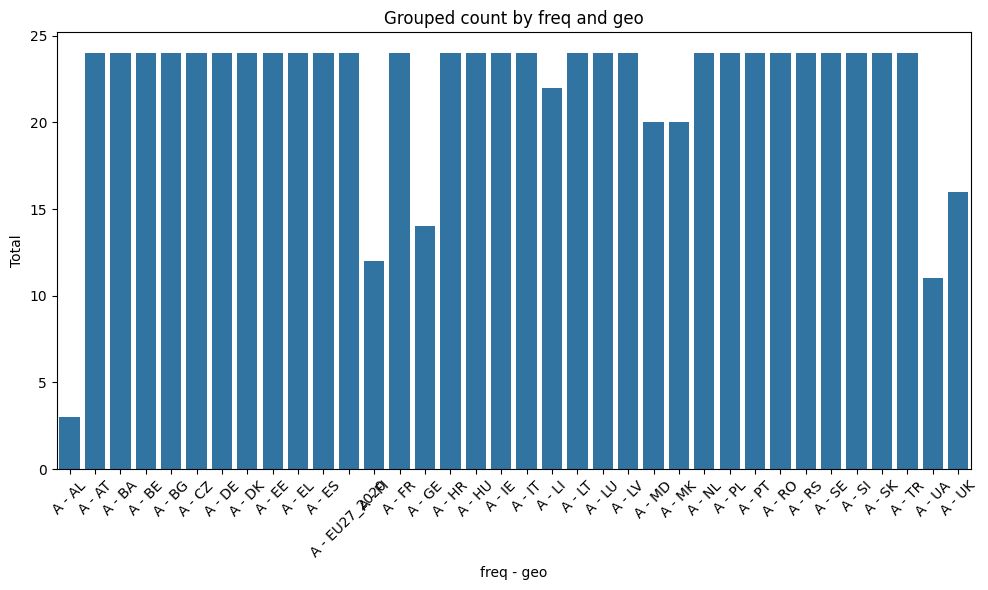


Count of grouped elements by freq, OBS_FLAG:


,freq,OBS_FLAG,Total
0,A,b,2
1,A,d,3
2,A,e,16
3,A,p,2


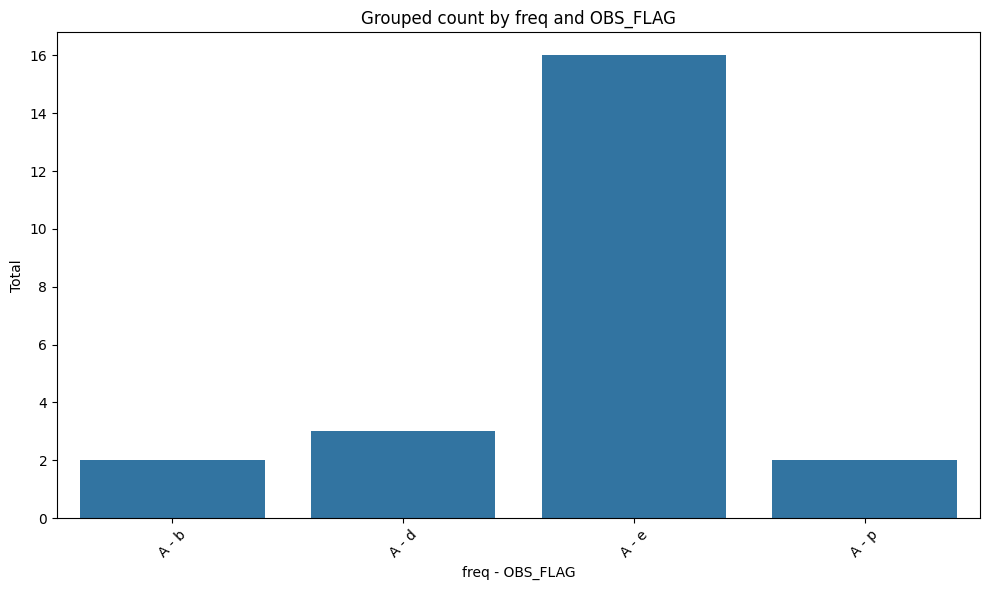


Count of grouped elements by freq, CONF_STATUS:


,freq,CONF_STATUS,Total
0,A,C,1


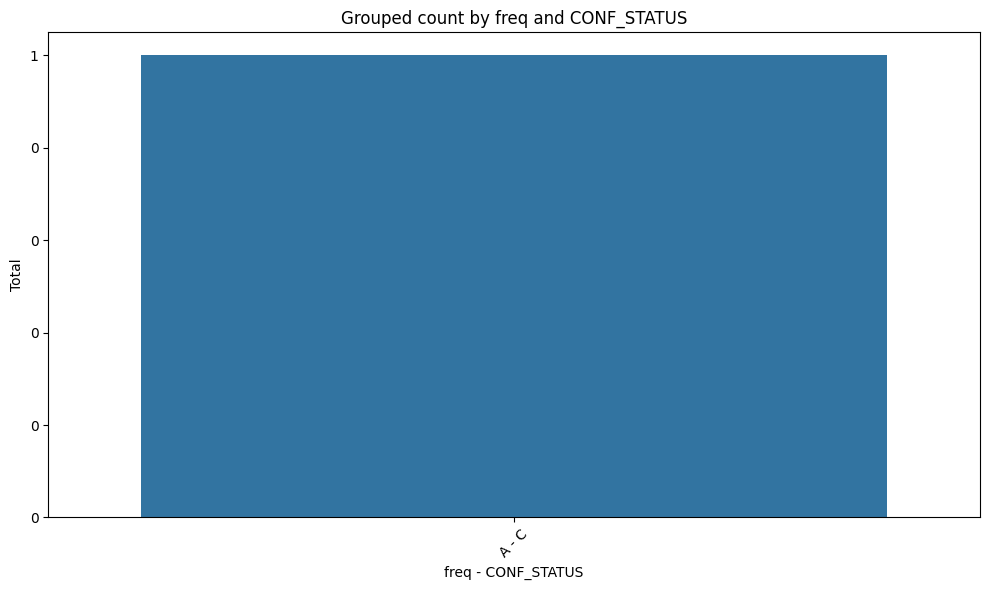


Count of grouped elements by currency, unit:


,currency,unit,Total
0,EUR,GJ_GCV,790


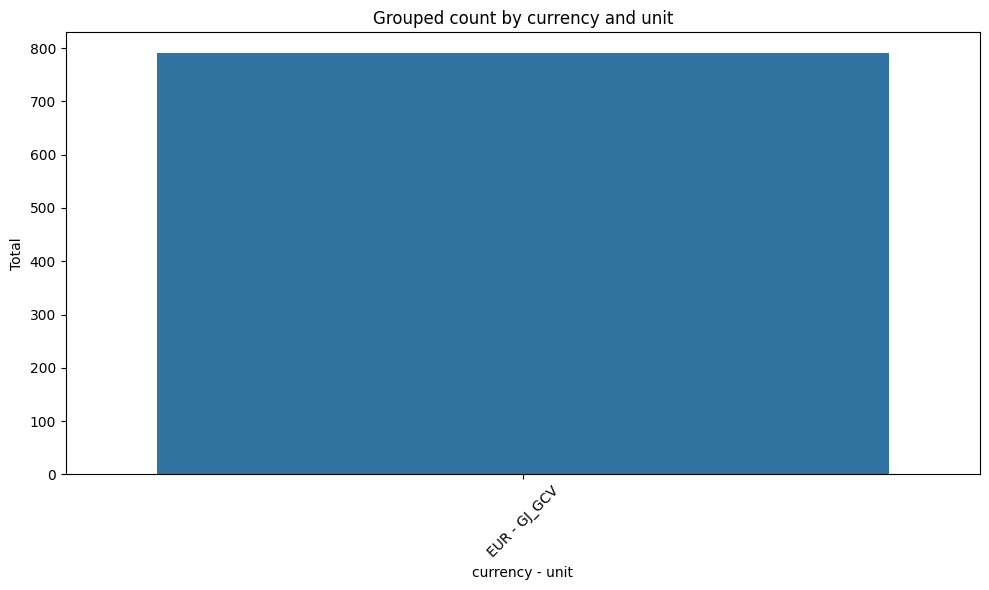


Count of grouped elements by currency, indic_en:


,currency,indic_en,Total
0,EUR,MSHH,388
1,EUR,MSIND,402


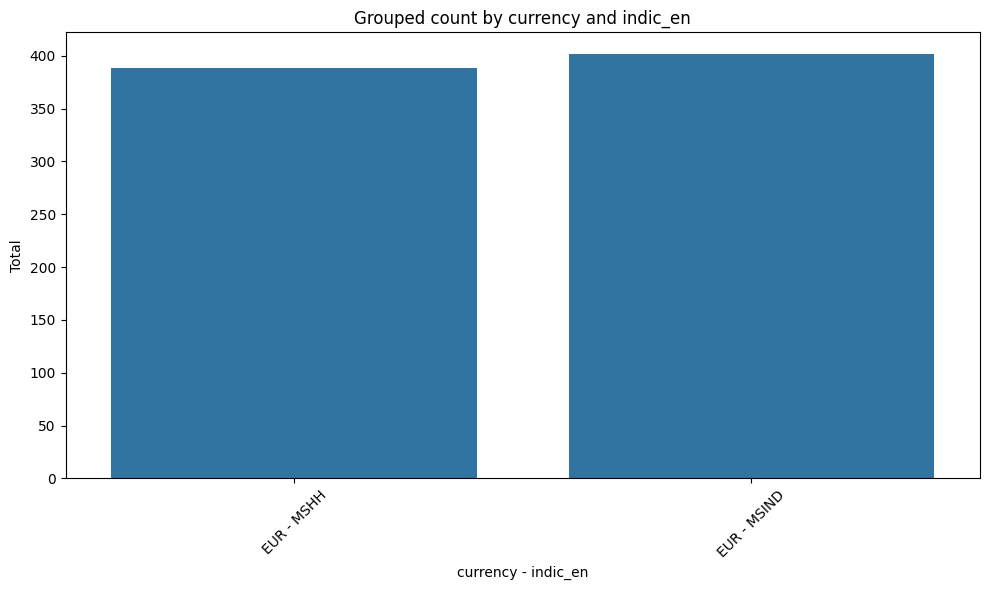


Count of grouped elements by currency, geo:


,currency,geo,Total
0,EUR,AL,3
1,EUR,AT,24
2,EUR,BA,24
3,EUR,BE,24
4,EUR,BG,24
5,EUR,CZ,24
6,EUR,DE,24
7,EUR,DK,24
8,EUR,EE,24
9,EUR,EL,24


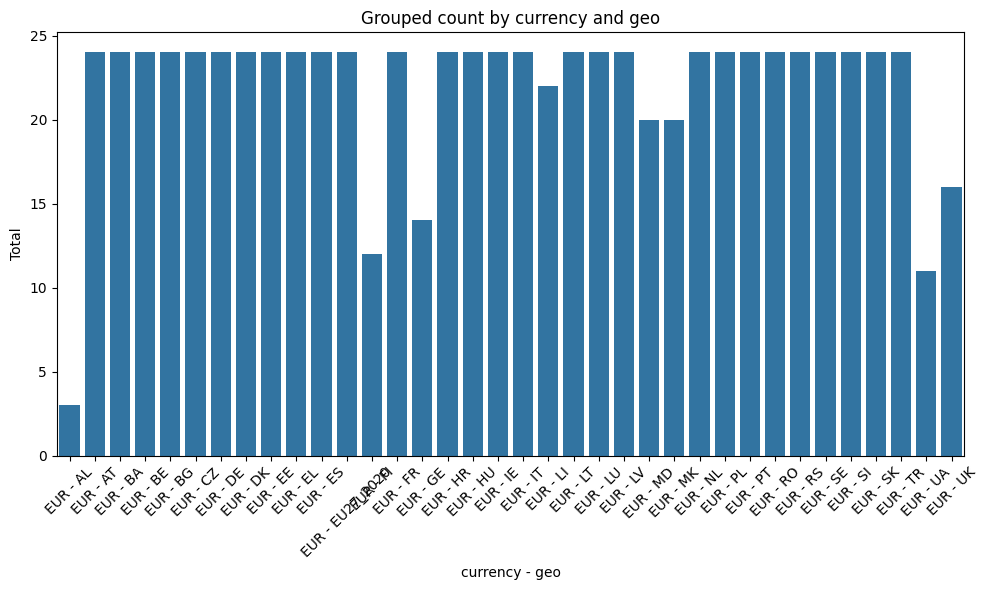


Count of grouped elements by currency, OBS_FLAG:


,currency,OBS_FLAG,Total
0,EUR,b,2
1,EUR,d,3
2,EUR,e,16
3,EUR,p,2


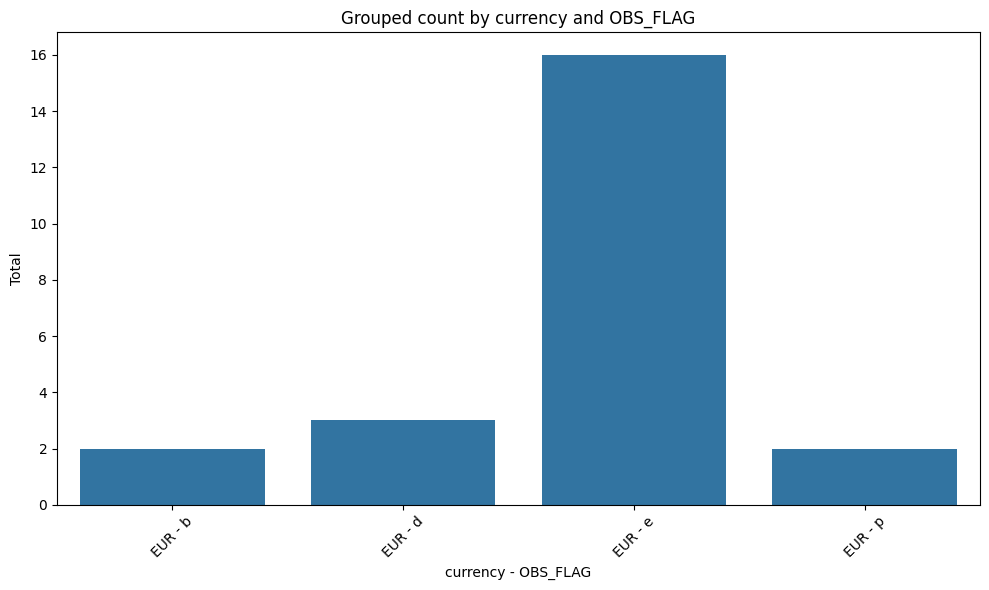


Count of grouped elements by currency, CONF_STATUS:


,currency,CONF_STATUS,Total
0,EUR,C,1


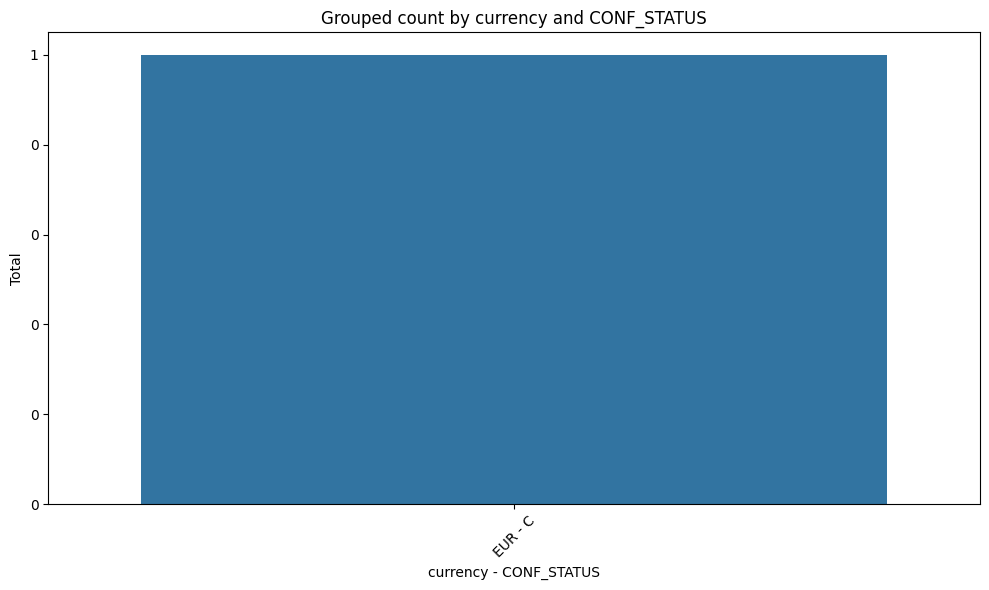


Count of grouped elements by unit, indic_en:


,unit,indic_en,Total
0,GJ_GCV,MSHH,388
1,GJ_GCV,MSIND,402


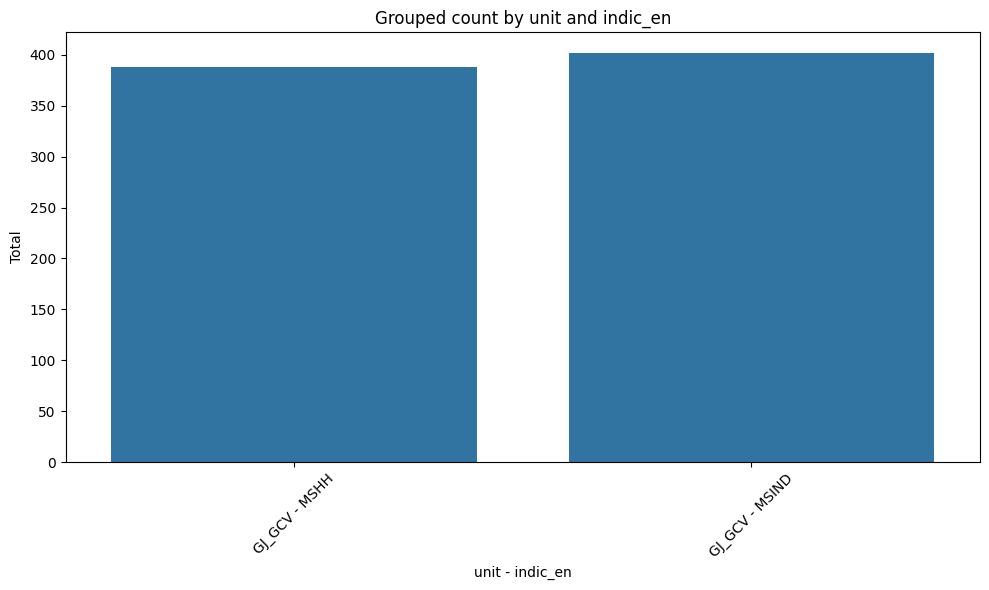


Count of grouped elements by unit, geo:


,unit,geo,Total
0,GJ_GCV,AL,3
1,GJ_GCV,AT,24
2,GJ_GCV,BA,24
3,GJ_GCV,BE,24
4,GJ_GCV,BG,24
5,GJ_GCV,CZ,24
6,GJ_GCV,DE,24
7,GJ_GCV,DK,24
8,GJ_GCV,EE,24
9,GJ_GCV,EL,24


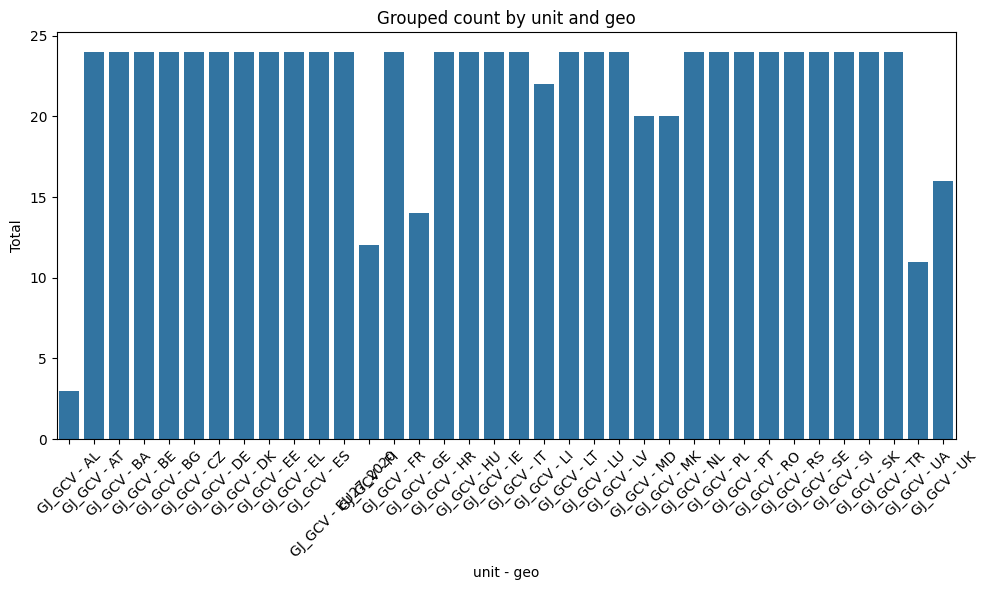


Count of grouped elements by unit, OBS_FLAG:


,unit,OBS_FLAG,Total
0,GJ_GCV,b,2
1,GJ_GCV,d,3
2,GJ_GCV,e,16
3,GJ_GCV,p,2


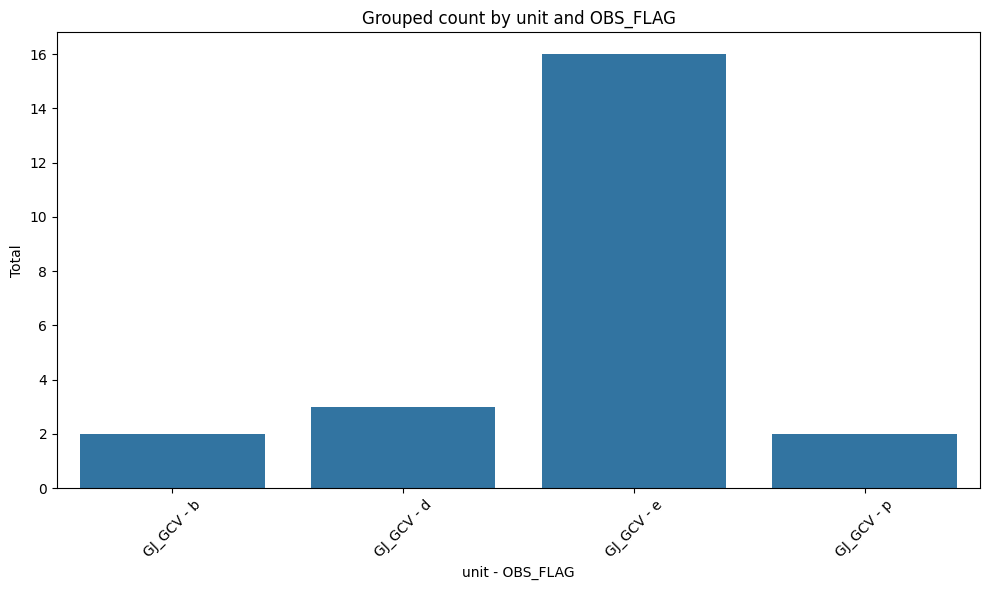


Count of grouped elements by unit, CONF_STATUS:


,unit,CONF_STATUS,Total
0,GJ_GCV,C,1


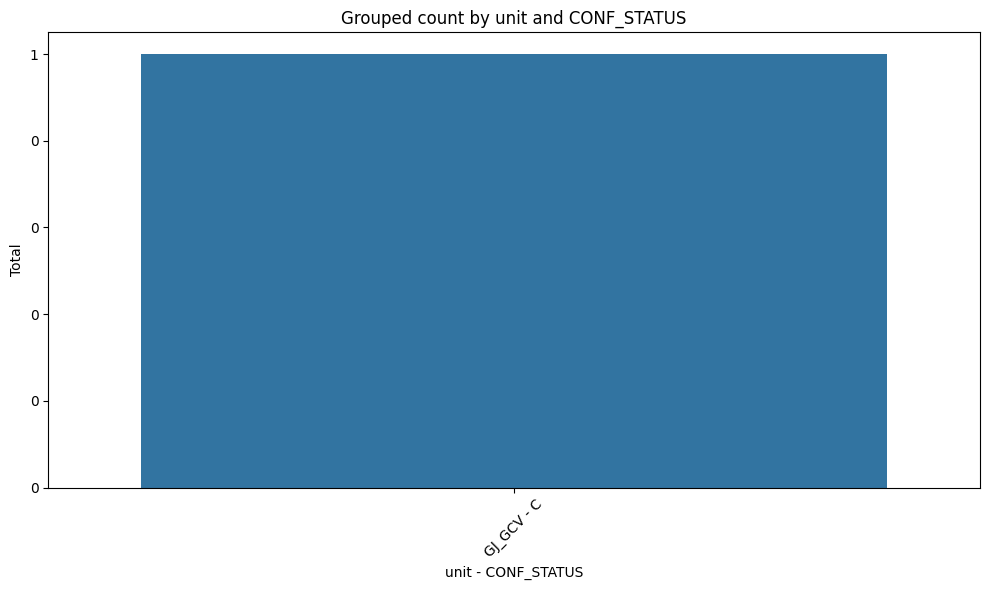


Count of grouped elements by indic_en, geo:


,indic_en,geo,Total
0,MSHH,AL,2
1,MSHH,AT,12
2,MSHH,BA,12
3,MSHH,BE,12
4,MSHH,BG,12
...,...,...,...
66,MSIND,SI,12
67,MSIND,SK,12
68,MSIND,TR,12
69,MSIND,UA,5


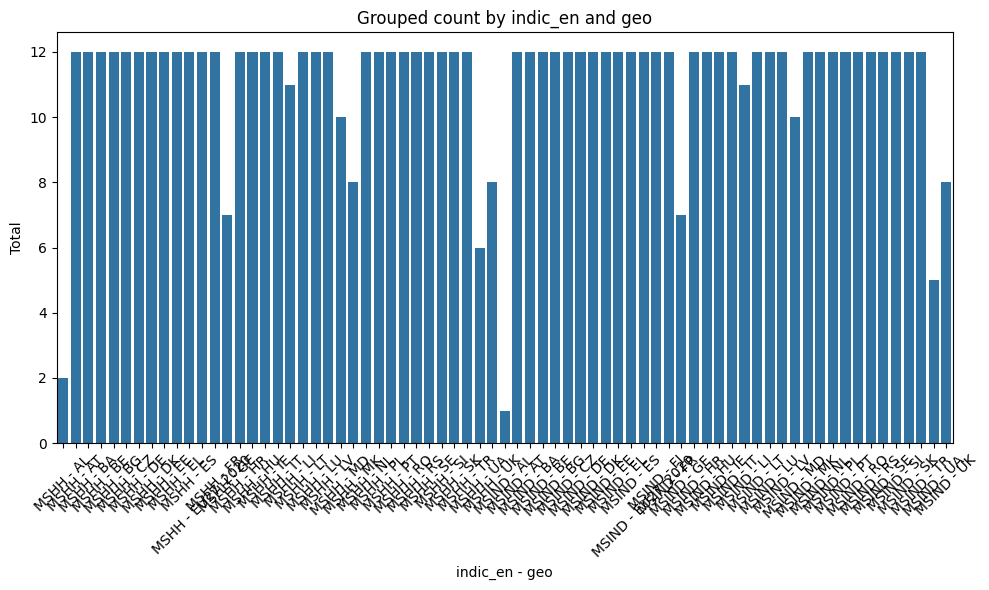


Count of grouped elements by indic_en, OBS_FLAG:


,indic_en,OBS_FLAG,Total
0,MSHH,b,1
1,MSHH,d,1
2,MSHH,e,9
3,MSHH,p,1
4,MSIND,b,1
5,MSIND,d,2
6,MSIND,e,7
7,MSIND,p,1


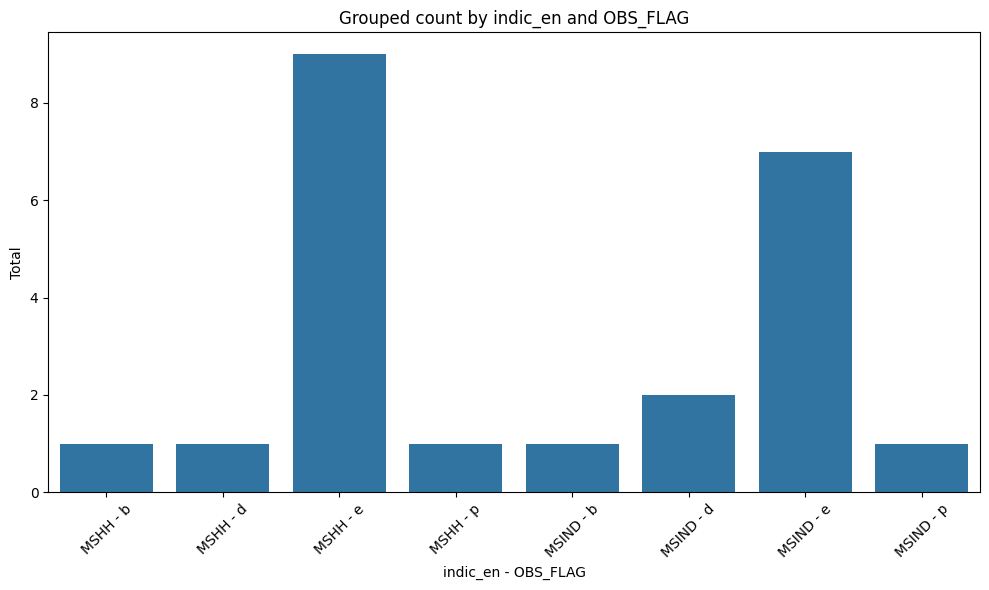


Count of grouped elements by indic_en, CONF_STATUS:


,indic_en,CONF_STATUS,Total
0,MSHH,C,1


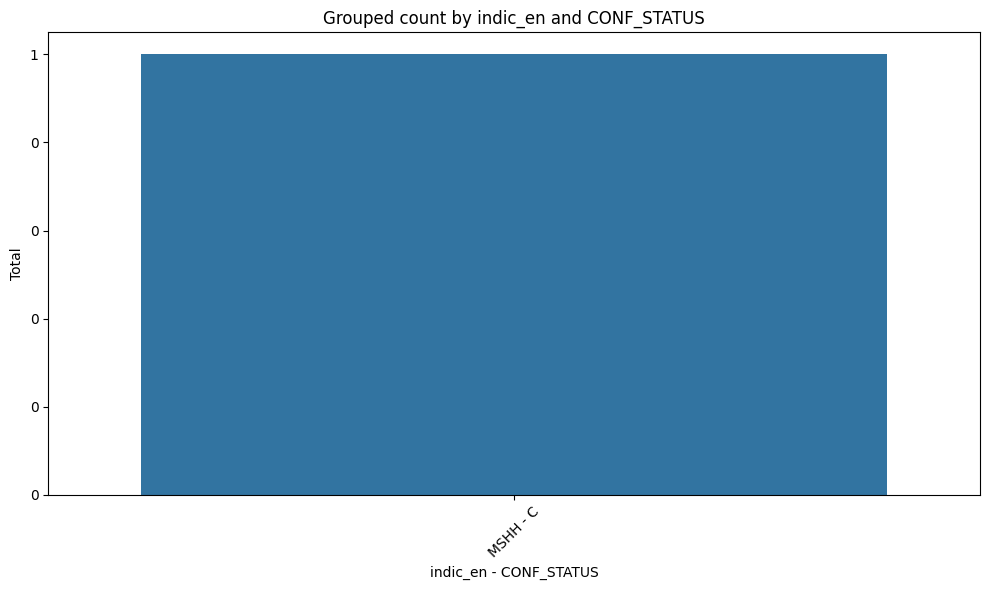


Count of grouped elements by geo, OBS_FLAG:


,geo,OBS_FLAG,Total
0,AL,d,1
1,AL,e,2
2,EL,e,2
3,EL,p,2
4,RO,d,2
5,RO,e,10
6,SE,b,2
7,SE,e,2


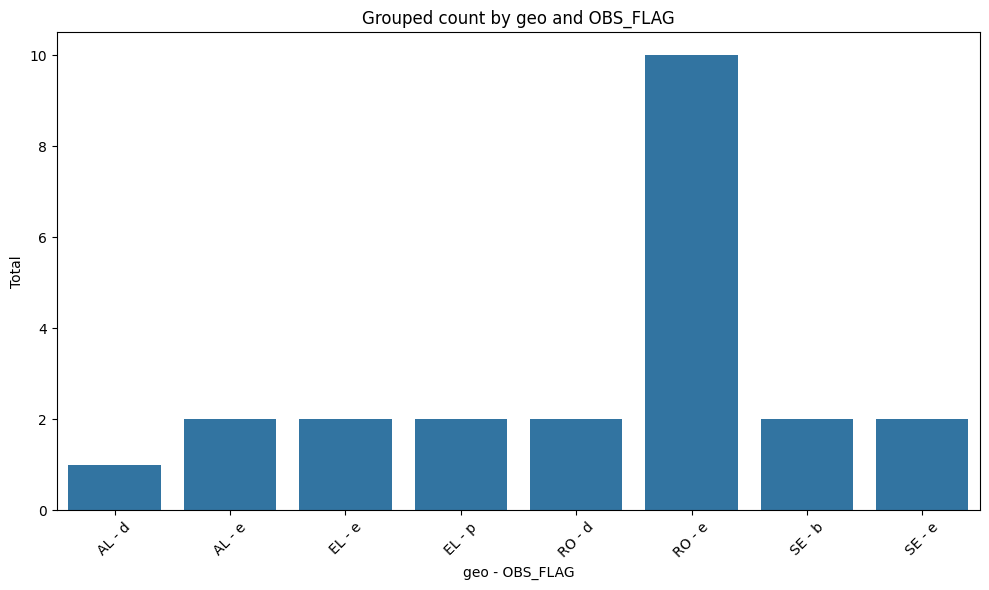


Count of grouped elements by geo, CONF_STATUS:


,geo,CONF_STATUS,Total
0,PL,C,1


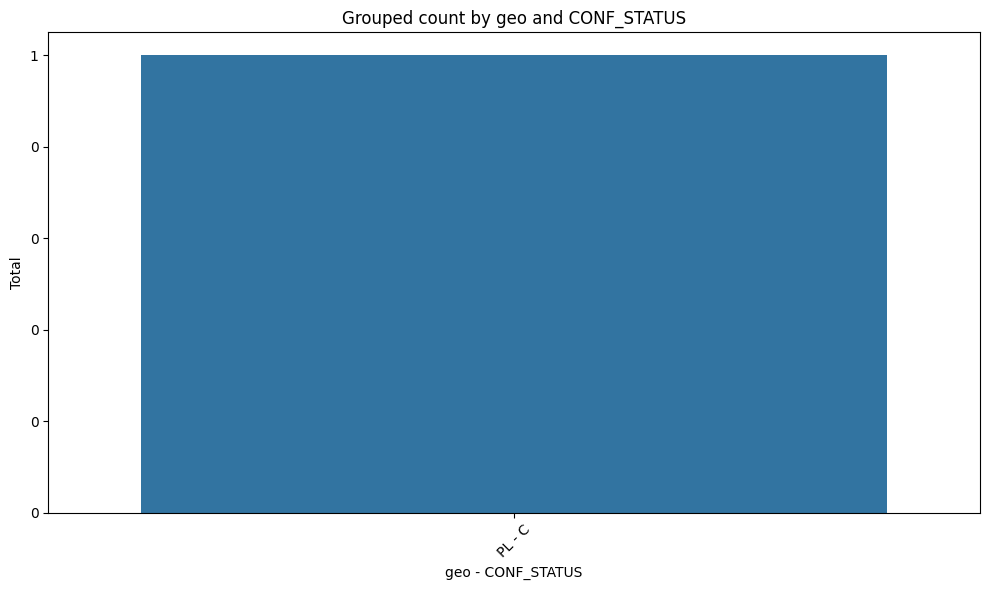


Count of grouped elements by OBS_FLAG, CONF_STATUS:


,OBS_FLAG,CONF_STATUS,Total


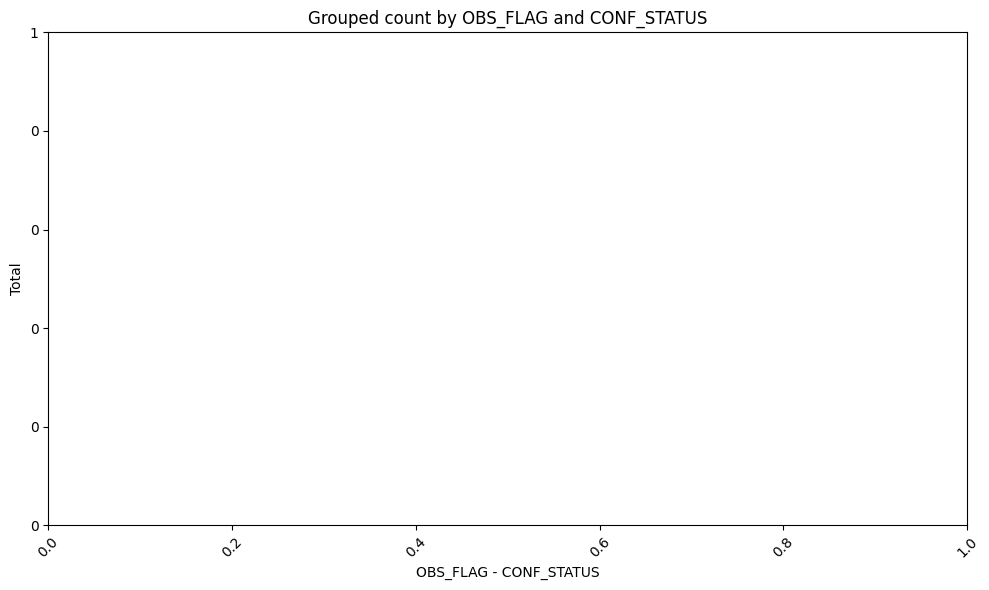


Descriptive statistics for 'product':


count     790.0
mean     4100.0
std         0.0
min      4100.0
25%      4100.0
50%      4100.0
75%      4100.0
max      4100.0
Name: product, dtype: float64


Descriptive statistics for 'TIME_PERIOD':


count     790.000000
mean     2018.578481
std         3.400707
min      2013.000000
25%      2016.000000
50%      2019.000000
75%      2021.000000
max      2024.000000
Name: TIME_PERIOD, dtype: float64


Descriptive statistics for 'OBS_VALUE':


count    789.000000
mean      14.254029
std        8.427620
min        0.000000
25%        8.143000
50%       11.600000
75%       18.533500
max       61.553400
Name: OBS_VALUE, dtype: float64

In [8]:
check_groupby(df, plot_graph=True)